In [5]:
import meep as mp
import numpy as np
from datetime import date
import pickle,json
import MyMeepFunctions as myF
import matplotlib.pyplot as plt 



Gap = 6.434e-01


fsrc = 1/1.5475 # frequency of eigenmode or constant-amplitude source
df = 16e-3


nfreq = 100
resolution = 10 #pixels per distance unit, so 10 px/um rn. (ideal)


#flux_freqs = mp.get_flux_freqs(src)

sim,src,tran,sphereMode = myF.buildWGMmodel(40,1/2,Gap,fsrc,df,resolution,nfreq)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000252008 s
Working in 2D dimensions.
Computational cell is 100 x 100 x 0 with resolution 10
     block, center = (0,-41.1434,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,0,0)
          radius 40, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
time for set_epsilon = 1.99798 s
-----------
MPB solved for frequency_1(0.4,0,0) = 0.325405 after 9 iters


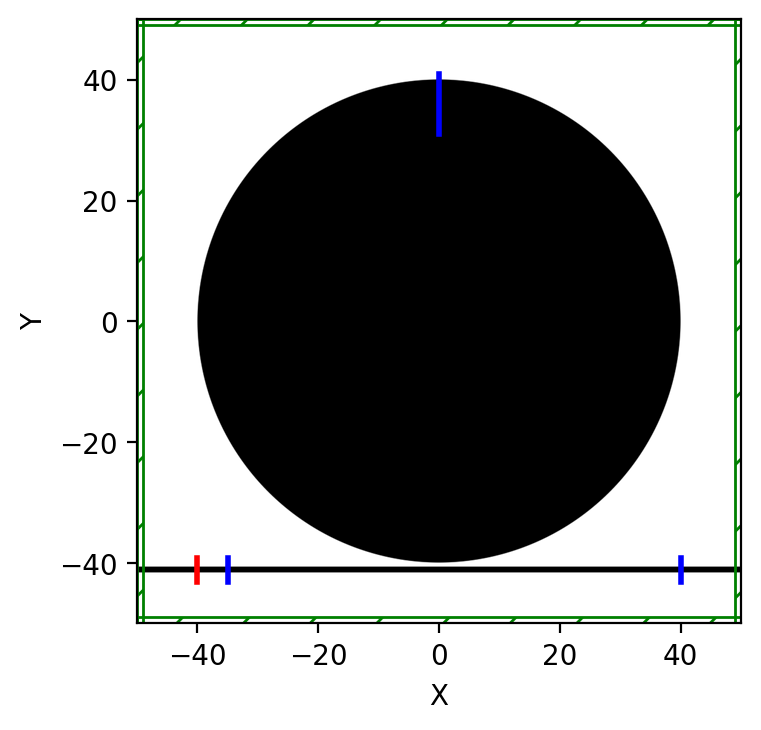

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=200)
sim.plot2D(plot_sources_flag=True,plot_monitors_flag=True)
plt.show()

In [10]:
t = (1e-6/3e8)
tFactor = 1e-15/t # converts femptoseconds into unitless MEEP 

Simtime = 1e3 #in femptoseconds

#sim.reset_meep()
sim.run(until=(Simtime*tFactor))

FloatProgress(value=300.04998779296875, description='0% done ', max=600.0499877929688, min=300.04998779296875)

on time step 6001 (time=300.05), 5.40907 s/step


KeyboardInterrupt: 

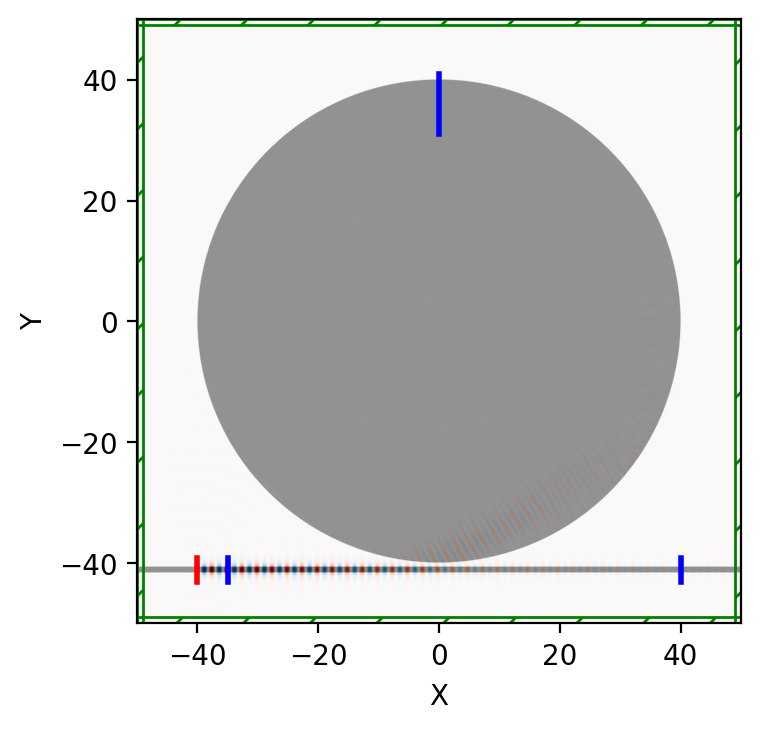

In [7]:
plt.figure(dpi=200)
sim.plot2D(fields=mp.Ez,plot_sources_flag=True,plot_monitors_flag=True)
plt.show()

In [9]:
mp.get_fluxes(tran)

[0.00023021960446018298,
 0.0002300975232128978,
 0.0002299754398710377,
 0.0002298533476643039,
 0.00022973124070637185,
 0.00022960911404118668,
 0.00022948696368146293,
 0.00022936478663915737,
 0.00022924258094799286,
 0.00022912034567745826,
 0.00022899808093809,
 0.00022887578787869032,
 0.0002287534686747646,
 0.00022863112650853114,
 0.00022850876554099495,
 0.000228386390875533,
 0.00022826400851470922,
 0.0002281416253087087,
 0.0002280192488978243,
 0.00022789688764779826,
 0.00022777455058012718,
 0.00022765224729624095,
 0.00022752998789764332,
 0.00022740778290184586,
 0.0002272856431548576,
 0.00022716357974181007,
 0.00022704160389406104,
 0.00022691972689754027,
 0.00022679795999887831,
 0.00022667631431285963,
 0.00022655480073086815,
 0.0002264334298309611,
 0.00022631221179160828,
 0.00022619115630738532,
 0.0002260702725099176,
 0.0002259495688929124,
 0.0002258290532426401,
 0.00022570873257426528,
 0.00022558861307482407,
 0.0002254687000525779,
 0.00022534899789

In [7]:
 sim.get_dft_array(sphereMode,mp.Ez,1)

ValueError: Invalid type of dft object: None